# ***Introduction***

## Aim
Using Linear Regression model to forecast and also determine the relationship between dependent variable (Life expectancy) and independent variable (other variables) by comparing using different model.

## About the dataset
Source: https://kaggle.com/kumarajarshi/life-expectancy-who

The dataset considers life expectancy from year 2000 to 2015 for 193 countries.

Dependent Variable

---


• Life Expectancy: Life expectancy in age


Independent Variables


---


• Status: Developed / Developing Country

• Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000

population)

• infant deaths: Number of Infant Deaths per 1000 population

• Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

• Percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita (%)

• Hepatitis B: Hepatitis B immunization coverage among 1-year-olds (%)

• Measles: Measles - number of reported cases per 1000 population

• BMI: Average Body Mass Index of entire population

• under-five deaths: Number of under-five deaths per 1000 population

• Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)

• Total expenditure: General government expenditure on health as a percentage of total government expenditure
(%)

• Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

• HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)

• GDP: Gross Domestic Product per capita (in USD)

• Population: Population of the country

• thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)

• thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)

• Income composition of resources: Human Development Index in terms of income composition of resources (index
ranging from 0 to 1)

• Schooling: Number of years of Schooling(years)

# ***Import and load***

In [4]:
file = '/content/Life Expectancy.csv'

In [5]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_absolute_error as MAE
from statsmodels.tools.eval_measures import mse, rmse

df = pd.read_csv(file)
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# ***Understanding dataset***

In [6]:
df.shape

(2938, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Peru,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938,NaN,NaN,NaN,2007.52,4.61384,2000,2004,2008,2012,2015
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2928,NaN,NaN,NaN,69.2249,9.52387,36.3,63.1,72.1,75.7,89
Adult Mortality,2928,NaN,NaN,NaN,164.796,124.292,1,74,144,228,723
infant deaths,2938,NaN,NaN,NaN,30.3039,117.927,0,0,3,22,1800
Alcohol,2744,NaN,NaN,NaN,4.60286,4.05241,0.01,0.8775,3.755,7.7025,17.87
percentage expenditure,2938,NaN,NaN,NaN,738.251,1987.91,0,4.68534,64.9129,441.534,19479.9
Hepatitis B,2385,NaN,NaN,NaN,80.9405,25.07,1,77,92,97,99
Measles,2938,NaN,NaN,NaN,2419.59,11467.3,0,0,17,360.25,212183


In [9]:
df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

# ***Data Cleaning***

Fill in the null value with their own mean value using groupby based on its Country 

In [11]:
groupby_country = df.groupby(['Country'])
groupby_country

def fill_null(series):
    return series.fillna(series.mean())

df["Population"] = groupby_country["Population"].transform(fill_null)
df["HepatitisB"] = groupby_country["HepatitisB"].transform(fill_null)
df["GDP"] = groupby_country["GDP"].transform(fill_null)
df["Total_expenditure"] = groupby_country["Total_expenditure"].transform(fill_null)
df["Alcohol"] = groupby_country["Alcohol"].transform(fill_null)
df["Income_composition_of_resources"] = groupby_country["Income_composition_of_resources"].transform(fill_null)
df["Schooling"] = groupby_country["Schooling"].transform(fill_null)
df["Thinness_1-19_years"] = groupby_country["Thinness_1-19_years"].transform(fill_null)
df["Thinness_5-9_years"] = groupby_country["Thinness_5-9_years"].transform(fill_null)
df["Diphtheria"] = groupby_country["Diphtheria"].transform(fill_null)
df["Polio"] = groupby_country["Polio"].transform(fill_null)
df["Adult_mortality"] = groupby_country["Adult_mortality"].transform(fill_null)
df["Life_expectancy"] = groupby_country["Life_expectancy"].transform(fill_null)

In [12]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                             17
Percentage_expenditure               0
HepatitisB                         144
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                                0
Total_expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                405
Population                         648
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

Since GDP and Population variables have many null values, we decided to drop these two variable.

In [13]:
df = df.drop(['Population','GDP'], axis = 1)

In [14]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                             17
Percentage_expenditure               0
HepatitisB                         144
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                                0
Total_expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

Drop all rows with null value 

In [15]:
df=df.dropna(axis=0)

In [16]:
df.isnull().any()

Country                            False
Year                               False
Status                             False
Life_expectancy                    False
Adult_mortality                    False
Infant_deaths                      False
Alcohol                            False
Percentage_expenditure             False
HepatitisB                         False
Measles                            False
BMI                                False
Under_five_deaths                  False
Polio                              False
Total_expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
Thinness_1-19_years                False
Thinness_5-9_years                 False
Income_composition_of_resources    False
Schooling                          False
dtype: bool

In [17]:
df.shape

(2608, 20)

Left with only 2608 rows/data after deleted all empty rows.

# ***EDA***

Using histogram, regplot and headmap to determine which independent variable has high correlation with dependent variable.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

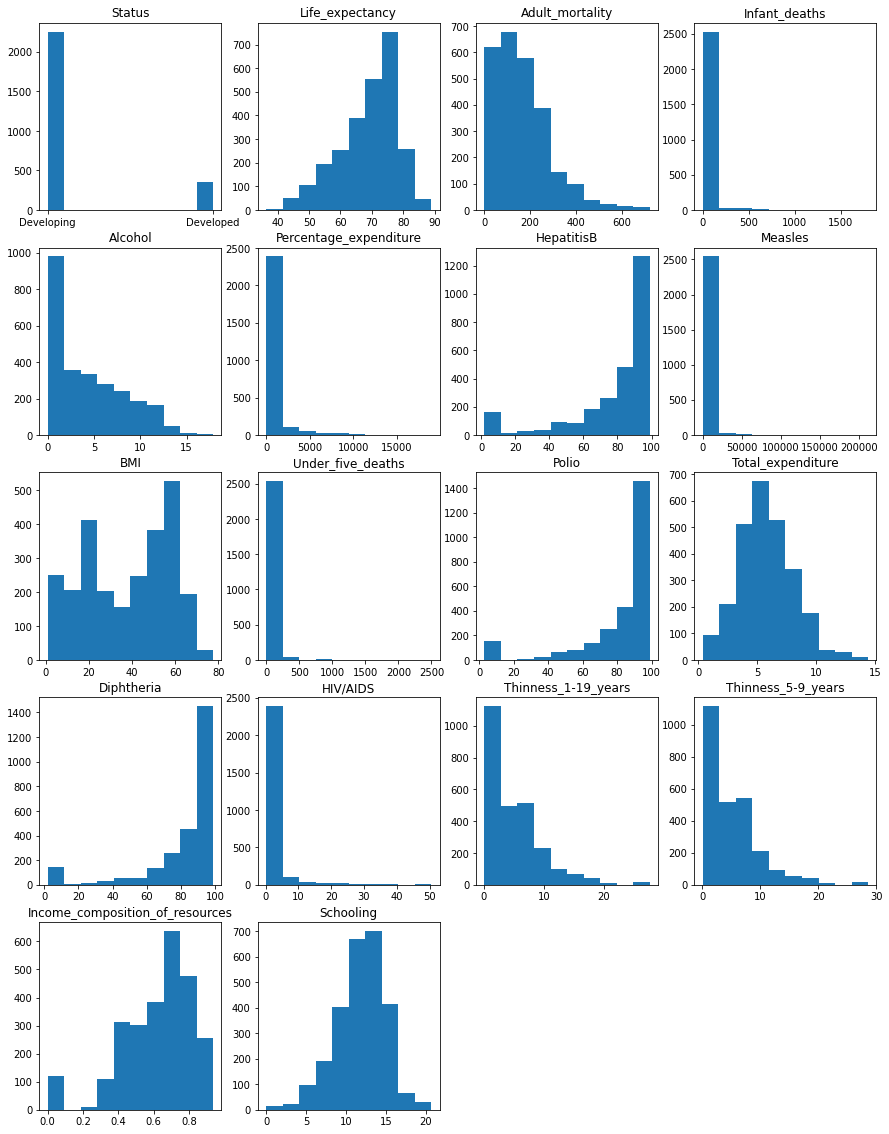

In [19]:
cont_vars = list(df.columns)[2:]
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(df[col])
    plt.title(col)

In [20]:
df['Status'] =  df['Status'].replace({"Developed": 1, "Developing": 0})

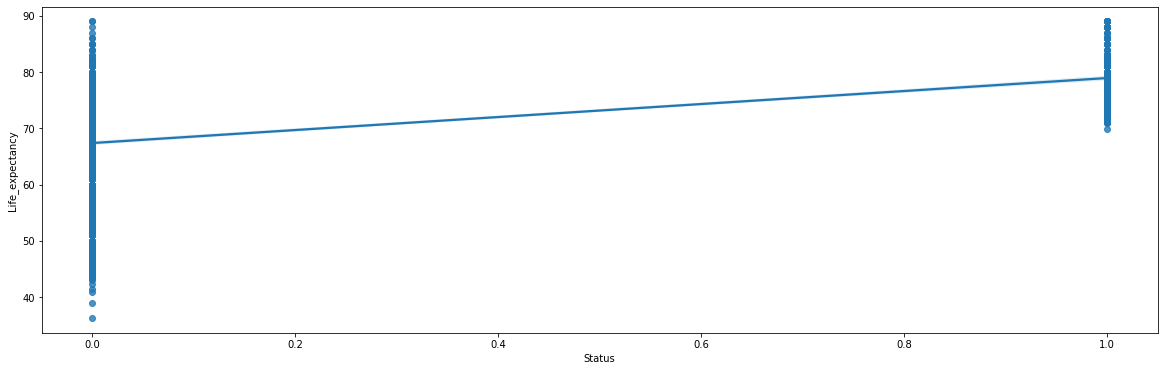

In [21]:
fig, ax = plt.subplots(figsize = (20,6), sharey = True, sharex = True)
sns.regplot(data = df, x = 'Status', y = 'Life_expectancy')

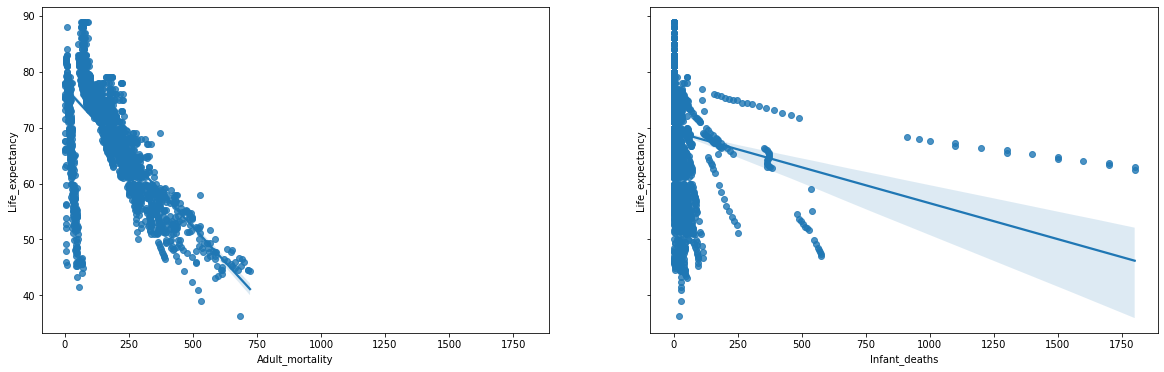

In [22]:
fig, ax = plt.subplots(1,2,figsize = (20,6), sharey = True, sharex = True)

sns.regplot(data = df, x = 'Adult_mortality', y = 'Life_expectancy', ax = ax[0])
sns.regplot(data = df, x = 'Infant_deaths', y = 'Life_expectancy', ax = ax[1])

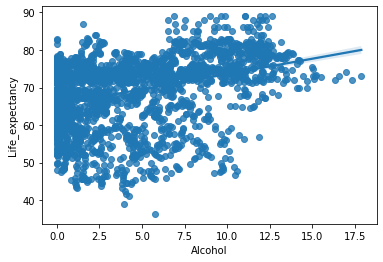

In [23]:
sns.regplot(data = df, x = 'Alcohol', y = 'Life_expectancy')

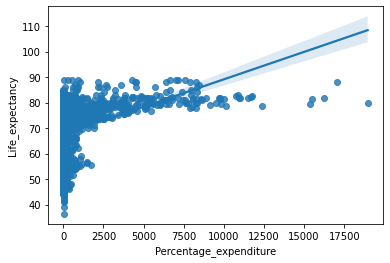

In [24]:
sns.regplot(data = df, x = 'Percentage_expenditure', y = 'Life_expectancy')

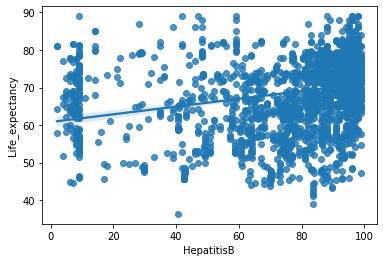

In [25]:
sns.regplot(data = df, x = 'HepatitisB', y = 'Life_expectancy')

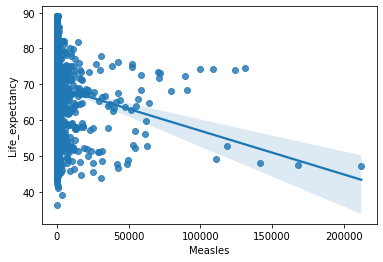

In [26]:
sns.regplot(data = df, x = 'Measles', y = 'Life_expectancy')

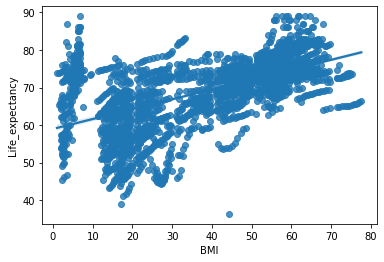

In [27]:
sns.regplot(data = df, x = 'BMI', y = 'Life_expectancy')

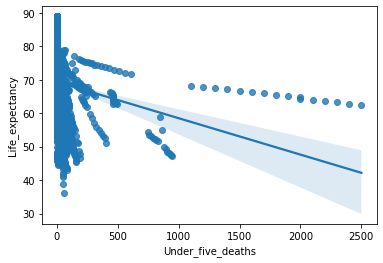

In [28]:
sns.regplot(data = df, x = 'Under_five_deaths', y = 'Life_expectancy')

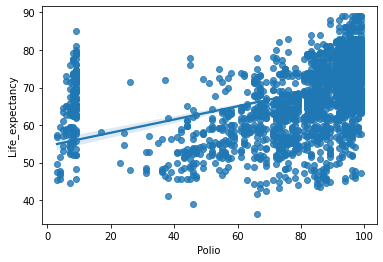

In [29]:
sns.regplot(data = df, x = 'Polio', y = 'Life_expectancy')

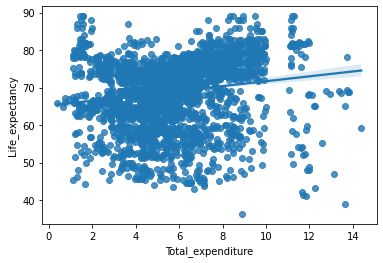

In [30]:
sns.regplot(data = df, x = 'Total_expenditure', y = 'Life_expectancy')

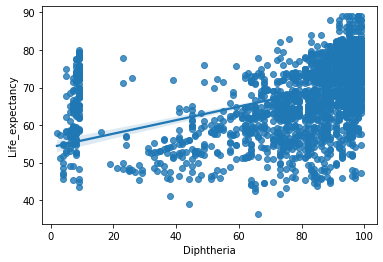

In [31]:
sns.regplot(data = df, x = 'Diphtheria', y = 'Life_expectancy')

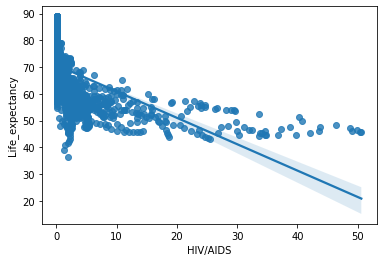

In [32]:
sns.regplot(data = df, x = 'HIV/AIDS', y = 'Life_expectancy')

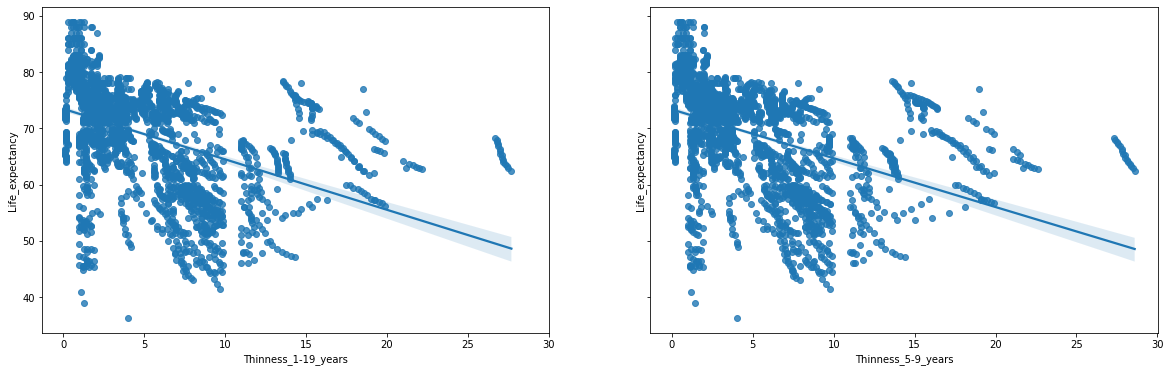

In [33]:
fig, ax = plt.subplots(1,2,figsize = (20,6), sharey = True, sharex = True)
sns.regplot(data = df, x = 'Thinness_1-19_years', y = 'Life_expectancy', ax = ax[0])
sns.regplot(data = df, x = 'Thinness_5-9_years', y = 'Life_expectancy', ax = ax[1])

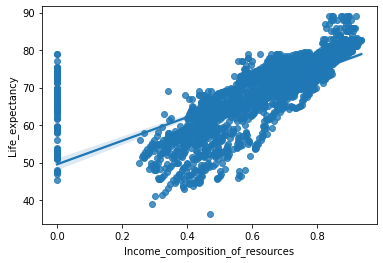

In [34]:
sns.regplot(data = df, x = 'Income_composition_of_resources', y = 'Life_expectancy')

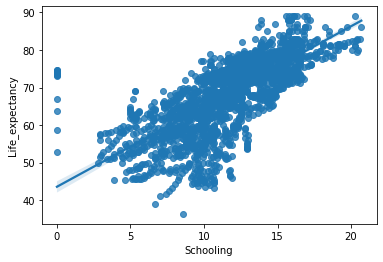

In [35]:
sns.regplot(data = df, x = 'Schooling', y = 'Life_expectancy')

In [36]:
df.shape

(2608, 20)

In [37]:
df_new = df.drop(['Country','Year'], axis = 1)
df_new.head()

,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


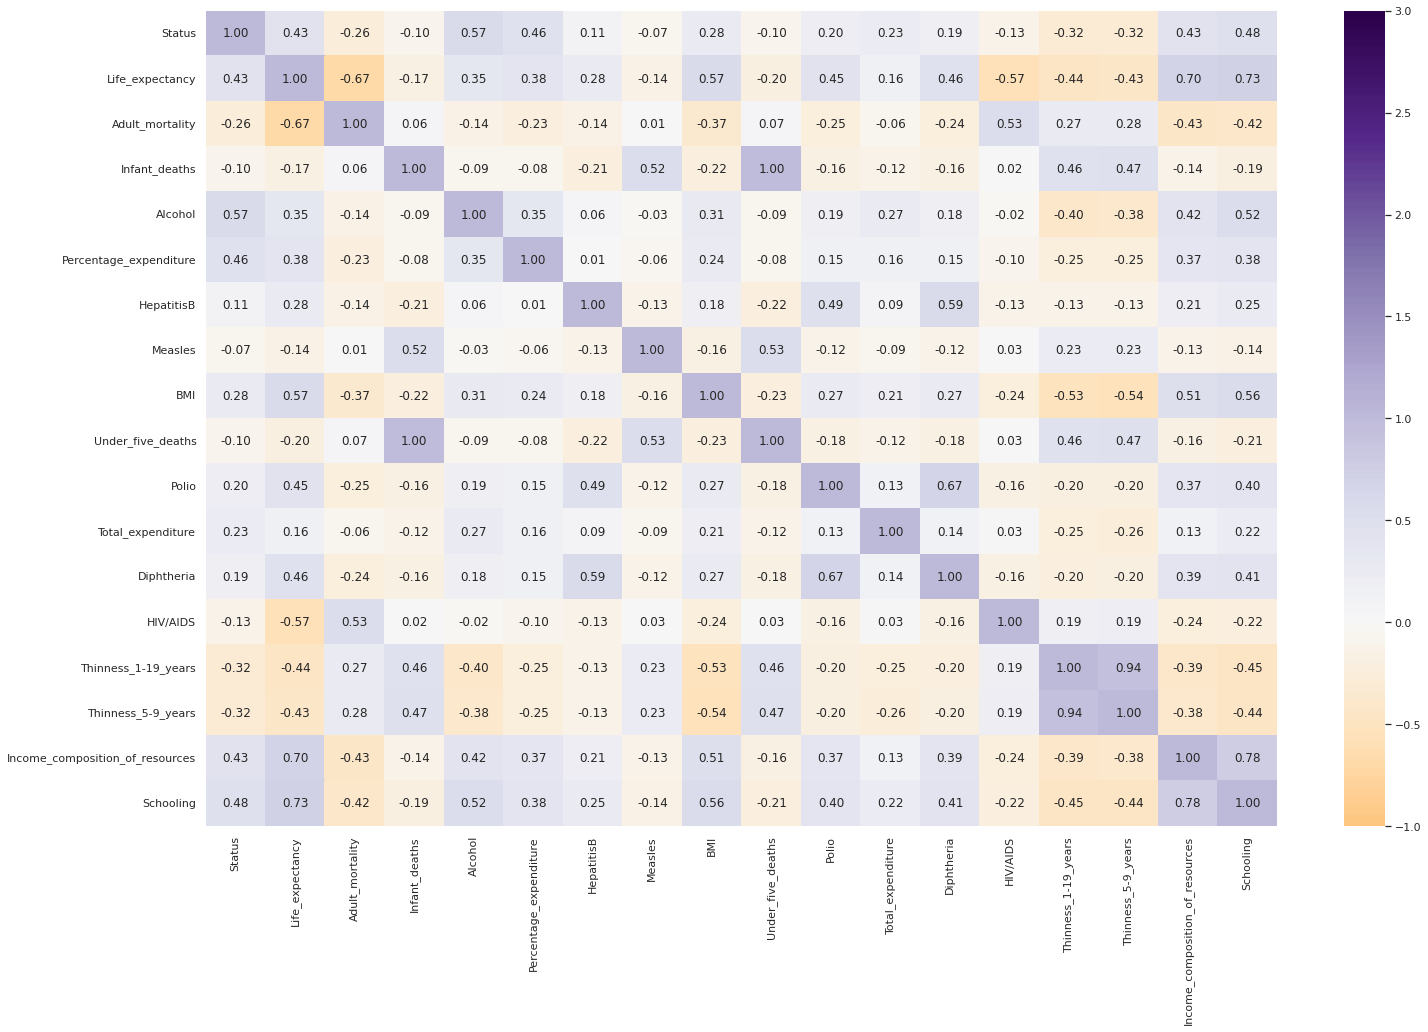

In [38]:
sns.set(rc = {'figure.figsize': (24,15)})
sns.heatmap(df_new.corr(), cmap = 'PuOr', fmt = '.2f', annot = True, vmin= -1, vmax= 3, center = 0)

# ***Task 1: Fit into simple Linear regression model (MODEL A)***

Based on the observation of EDA done above, let

y = Life_expectancy, 

x = Schooling

This is due to the EDA shows that there is a linear correlation between x and y variable. (Correlation of 0.75)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
from sklearn.model_selection import train_test_split
y = df_new['Life_expectancy']
X = df_new['Schooling']

X = X.values.reshape(-1, 1)


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# r-sq
model.score(X_train,Y_train)

0.5249983247117167

In [43]:
print(f"Intercept = {model.intercept_}")
print(f"Coefficients = {model.coef_}")

Intercept = 43.793297109630316
Coefficients = [2.11348121]


In [44]:
y_pred = model.predict(X_test)
y_pred

array([60.0671024 , 69.78911596, 76.12955958, 64.92810918, 72.32529341,
       68.09833099, 61.75788737, 76.12955958, 51.8245257 , 69.15507159,
       78.03169266, 69.36641972, 75.2841671 , 69.78911596, 76.3409077 ,
       62.60327985, 66.1961979 , 72.53664153, 54.99474751, 63.44867234,
       60.0671024 , 61.12384301, 71.90259716, 59.0103618 , 69.36641972,
       76.55225582, 61.12384301, 66.40754603, 68.30967911, 66.1961979 ,
       68.09833099, 74.22742649, 79.93382575, 68.30967911, 74.86147085,
       62.39193173, 81.20191448, 56.05148811, 72.32529341, 61.96923549,
       61.75788737, 70.63450844, 53.9380069 , 63.02597609, 75.49551522,
       69.36641972, 71.90259716, 73.80473025, 72.74798965, 64.71676106,
       71.47990092, 73.80473025, 67.88698287, 77.82034454, 71.69124904,
       63.66002046, 53.51531066, 70.00046408, 71.2685528 , 70.63450844,
       74.86147085, 72.53664153, 59.85575428, 52.03587382, 67.04159039,
       74.22742649, 58.79901368, 52.03587382, 78.24304079, 73.38

In [45]:
print("R-squared of the model in training set is: {}".format(model.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(model.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(MAE(Y_test, y_pred)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100))

R-squared of the model in training set is: 0.5249983247117167
-----Test set statistics-----
R-squared of the model in test set is: 0.5784371838445691
Mean absolute error of the prediction is: 4.590924711038387
Mean squared error of the prediction is: 37.55641444292036
Root mean squared error of the prediction is: 6.128328845853521
Mean absolute percentage error of the prediction is: 7.245831018980731


Since the R² value on test data(0.5784371838445691) is around 5% of the R² value on training data(0.5249983247117167), we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.


However, the R² value is somewhere 0.5 which indicate that this value is generally considered a Moderate effect size. Therefore, the schooling is not explaining much in the variation of the life expectancy but just moderate.

# ***Task 2a : Fit into Multiple Linear Regression (MODEL B)***

Based on the observation of EDA done above, let

y = Life_expectancy, 

x = BMI, Total expenditure, Income composition of resources and Schooling

These selection of independent variable is based on the heatmap corr values between dependent and independent variables too.


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
multidata = df.copy()

x = multidata.iloc[:, [-10,-7,-2,-1]].values  # took the four columns (BMI,Total_expenditure, Income_composition_of_resources and Schooling) as independent variables.                              
y = multidata["Life_expectancy"].values.reshape(-1,1)    

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print("Intercept: ", lm.intercept_)
print("Coefficent 1 , Coefficent 2,  Coefficent 3,  Coefficent4: ", lm.coef_)

Intercept:  [43.75861347]
Coefficent 1 , Coefficent 2,  Coefficent 3,  Coefficent4:  [[ 0.08928844  0.01470696 14.23122539  1.08275668]]


In [49]:
#r-sq
lm.score(x_train, y_train) 

0.6005278320655405

In [50]:
  #CV r-sq value of the model
  cross_val_score(lm, x_train,  y_train, cv= 10, scoring="r2").mean()

0.5957911454297518

In [51]:
y_predict = lm.predict(x_test)
y_predict

array([[59.99544455],
       [70.18997434],
       [76.43954049],
       [63.30848138],
       [74.09910341],
       [71.35083102],
       [61.03724447],
       [76.26643218],
       [53.58244819],
       [61.68560832],
       [77.95597634],
       [69.79297621],
       [75.59025551],
       [67.41351152],
       [72.65426066],
       [61.13218118],
       [59.30180141],
       [75.88921193],
       [56.08867905],
       [65.08285836],
       [60.28514854],
       [61.31469293],
       [71.05571719],
       [60.69222554],
       [71.47220119],
       [75.65202351],
       [62.13415522],
       [67.91278291],
       [66.11527997],
       [59.21165041],
       [69.89511971],
       [75.30448347],
       [80.48825732],
       [67.16720732],
       [75.81831813],
       [61.77079677],
       [81.54750639],
       [55.95770026],
       [74.2241054 ],
       [60.62121439],
       [60.87578243],
       [71.86132115],
       [55.23088519],
       [61.51057462],
       [77.36808112],
       [73

Test r2 error =  0.629082087090441


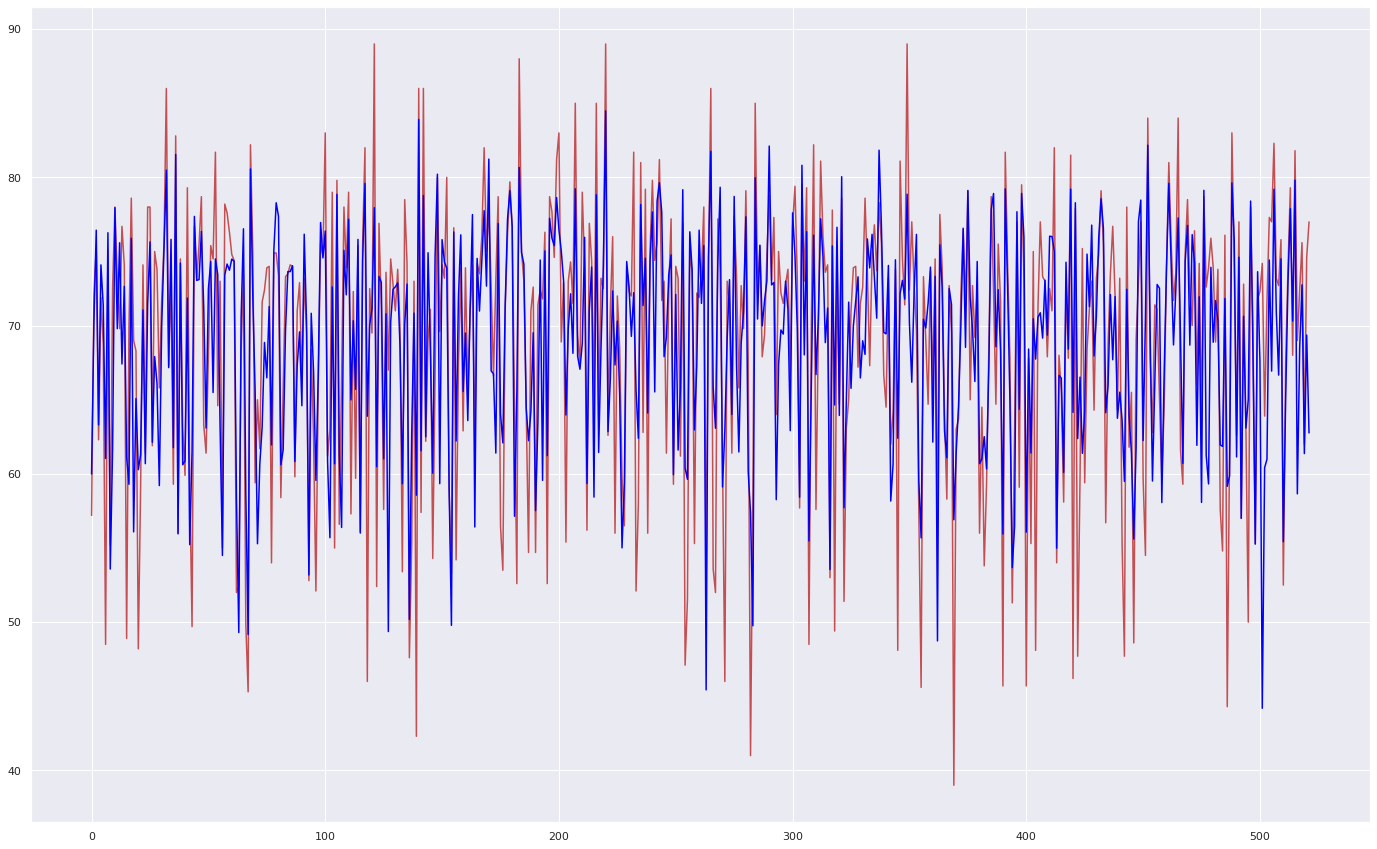

In [52]:
y_test_1 =np.array(range(0,len(y_test)))
# r2 value: 
r2_degeri = r2_score(y_test, y_predict)
print("Test r2 error = ",r2_degeri) 

plt.plot(y_test_1,y_test,color="r")
plt.plot(y_test_1,y_predict,color="blue")
plt.show()

In [53]:
print("R-squared of the model in training set is: {}".format(lm.score(x_train, y_train)))
print("Cross value R-squared of the model in training set is: {}".format(cross_val_score(lm, x_train,  y_train, cv= 10, scoring="r2").mean()))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lm.score(x_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(MAE(y_test, y_predict)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_predict)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y_train, lm.predict(x_train))))

R-squared of the model in training set is: 0.6005278320655405
Cross value R-squared of the model in training set is: 0.5957911454297518
-----Test set statistics-----
R-squared of the model in test set is: 0.629082087090441
Mean absolute error of the prediction is: 4.199467415118036
Mean squared error of the prediction is: [33.04453412]
Root mean squared error of the prediction is: 33.22308421351975


Since the difference  of r-squared value between the training set and the test set is not much which only have 0.0286, so this modeling is good and can be use.

# ***Task 2b : Fit into Reduced Model of Multiple Linear Regression (MODEL C)***

In [54]:
## scikit-learn method for determine the p-value
## sklearn.feature_selection.f_regression(X, Y, *, center=True)
## f_regression(X, Y, *, center=True)

Using statsmodel's OLS method to determine the p-value of Model B to do the reduced model.

In [55]:
import statsmodels.api as sm 
X = df[['BMI','Total_expenditure','Income_composition_of_resources','Schooling']]
Y = df['Life_expectancy']
X = sm.add_constant(X)
fit = sm.OLS(Y, X).fit()
for attributeIndex in range (0,4):
  print(fit.pvalues[attributeIndex])
print(fit.summary())

0.0
9.159895101689679e-40
0.6320925372428384
2.437927139893421e-47
                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1005.
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:15:30   Log-Likelihood:                -8266.1
No. Observations:                2608   AIC:                         1.654e+04
Df Residuals:                    2603   BIC:                         1.657e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

The p-value for Total_expenditure (0.632) is the highest p-value that is greater than 0.05, so can reduce the model by removing this term. Other than that, the p-value for BMI was 0, means that it might be a good outcome. It is because the p-value for each term tests the null hypothesis that the coefficients (b1, b2, ..., bn) are equal to zero causing no effect to the fitting equation y = b0 + b1x1 + b2x2... A low p-value (< 0.05) indicates that you can reject the null hypothesis.

## ***Now lets use this reduced model to recalculate the r-square value again.***

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
multidata2 = df.copy()

x2 = multidata2.iloc[:, [-10,-2,-1]].values  # took the three columns (BMI, Income_composition_of_resources, and Schooling) as independent variables.                              
y2 = multidata2["Life_expectancy"].values.reshape(-1,1)    

In [57]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20, random_state= 42)
lm2 = LinearRegression()
lm2.fit(x2_train,y2_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print("Intercept: ", lm2.intercept_)
print("Coefficent 1 , Coefficent 2,  Coefficent 3: ", lm2.coef_)

Intercept:  [43.81599129]
Coefficent 1 , Coefficent 2,  Coefficent 3:  [[ 0.08950526 14.21036449  1.08541224]]


In [59]:
#r-sq
lm2.score(x2_train, y2_train) 

0.6005158525112819

In [60]:
#CV r-sq value of the model
cross_val_score(lm2, x2_train,  y2_train, cv= 10, scoring="r2").mean()

0.5958585511094883

In [61]:
y2_predict = lm2.predict(x2_test)
y2_predict

array([[59.97429062],
       [70.17728259],
       [76.42118622],
       [63.26061896],
       [74.11474667],
       [71.23654226],
       [61.0483065 ],
       [76.25010945],
       [53.54522934],
       [61.7100245 ],
       [77.96664784],
       [69.81553489],
       [75.56983694],
       [67.39820034],
       [72.65350916],
       [61.03363997],
       [59.34014737],
       [75.86395674],
       [56.07025783],
       [65.05486867],
       [60.30786998],
       [61.36002769],
       [71.07908918],
       [60.71696993],
       [71.43299424],
       [75.69669392],
       [62.13733035],
       [67.94288388],
       [66.14104902],
       [59.27749368],
       [69.92645109],
       [75.32979154],
       [80.4510983 ],
       [67.19886828],
       [75.83212818],
       [61.76304588],
       [81.52237998],
       [55.96492339],
       [74.20436425],
       [60.61243477],
       [60.87871087],
       [71.88837108],
       [55.20016094],
       [61.42336833],
       [77.35206287],
       [73

Test r2 error =  0.6293720866484377


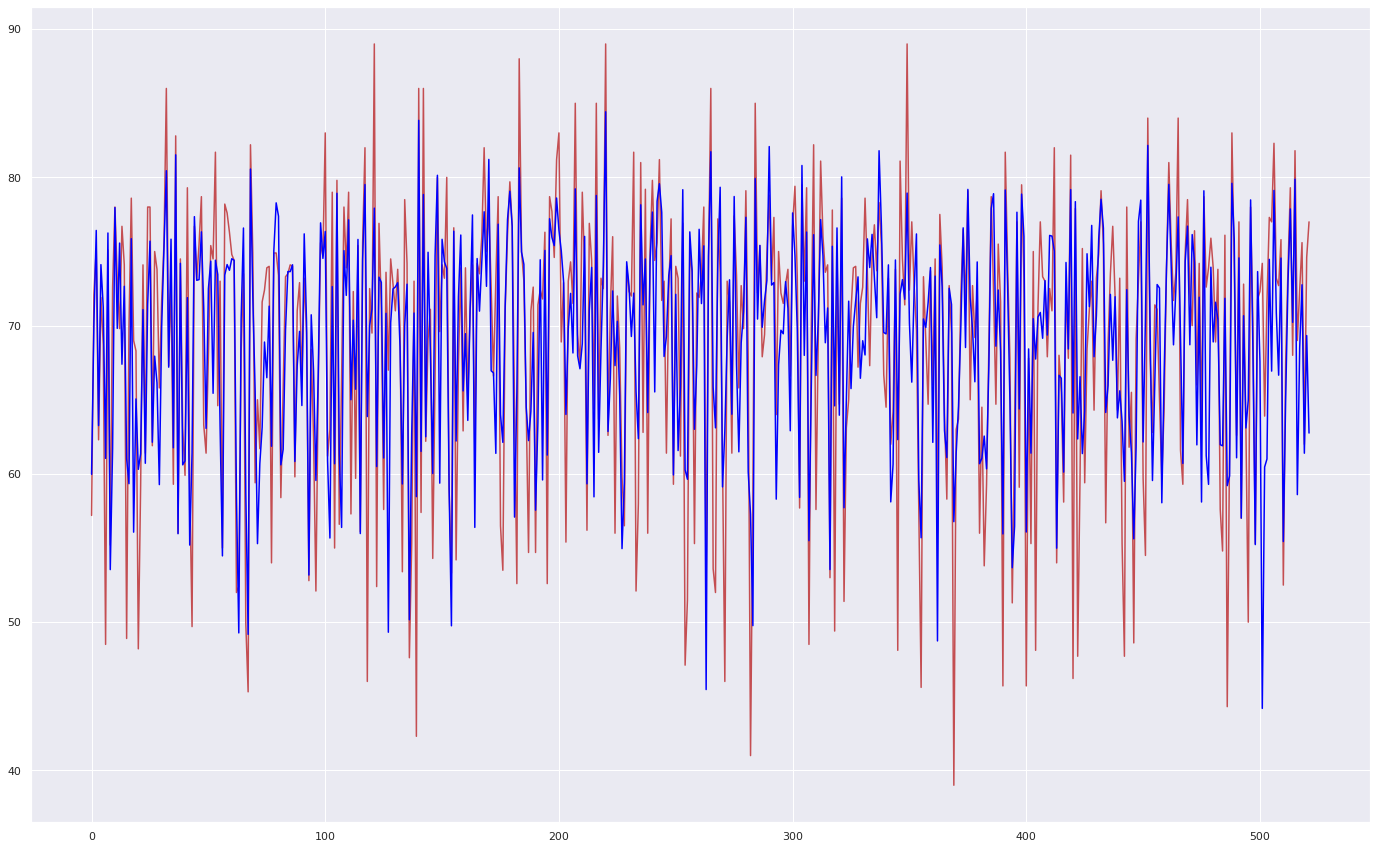

In [62]:
y_test_2 =np.array(range(0,len(y2_test)))
# r2 value: 
r2_degeri = r2_score(y2_test, y2_predict)
print("Test r2 error = ",r2_degeri) 

plt.plot(y_test_2,y2_test,color="r")
plt.plot(y_test_2,y2_predict,color="blue")
plt.show()

In [63]:
print("R-squared of the model in training set is: {}".format(lm2.score(x2_train, y2_train)))
print("Cross value R-squared of the model in training set is: {}".format(cross_val_score(lm2, x2_train,  y2_train, cv= 10, scoring="r2").mean()))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lm2.score(x2_test, y2_test)))
print("Mean absolute error of the prediction is: {}".format(MAE(y2_test, y2_predict)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y2_predict)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y2_train, lm2.predict(x2_train))))

R-squared of the model in training set is: 0.6005158525112819
Cross value R-squared of the model in training set is: 0.5958585511094883
-----Test set statistics-----
R-squared of the model in test set is: 0.6293720866484377
Mean absolute error of the prediction is: 4.199009066332167
Mean squared error of the prediction is: [33.01869848]
Root mean squared error of the prediction is: 33.22408052257934


Since the difference  of r-squared value between the training set and the test set is not much which only have 0.02885, so this modeling is good and can be use also. However, there is no big different between model B and model C.

# ***Task 3 : Comparison of Three Model***

Based on the three model above, we can know that the r-square for each model is:

Model A (in task 1) : 0.5249983247117167

Model B (in task 2a）: 0.6005278320655405

Model C（in task 2b) : 0.6005158525112819

Although there is no different between MODEL B and MODEL C in R-squared value, however we can know that MODEL B is the better model than MODEL C with a higher R-squared values and more variable in consideration. The reason choosing the model based on R-squared value is due to the higher R-squared values represent smaller differences between the observed data and the fitted values.

# ***Task 4 : 95% confidence interval of life expectancy***

In [64]:
## MODEL_B
## Intercept:  [43.75861347]
## Coefficent 1 , Coefficent 2,  Coefficent 3,  Coefficent4:  [[ 0.08928844  0.01470696 14.23122539  1.08275668]]

We decided to use a set of reasonable X values based on the values around the central tendency for each of the independent variables which shows below:

BMI : [40], 

Total_expenditure : [6], 

Income_composition_of_resources : [0.7],

Schooling : [12]

In [65]:
y_cap = 43.75861347 + (0.08928844*40) + (6*0.01470696) + (0.7*14.23122539) + (12*1.08275668)

In [66]:
con_coef = 0.95

alpha = 1 - con_coef
n = len(df_new)
sigma = y_predict.std() # 7.3427283650857404

import math
import scipy.stats as stats
z_critical = stats.norm.ppf(q = 0.975) # 1,96
z_interval = stats.norm.interval(alpha=con_coef) # +/- 1.96

se = sigma / math.sqrt(n) # 0.1437817180844099

CI_lower = y_cap - z_critical * se
CI_upper = y_cap + z_critical * se

In [67]:
CI_lower , CI_upper

(70.09152377391926, 70.65513775208073)

Hence, the 95% confidence interval for Life_expectancy when BMI : 40, Total_expenditure : 6% ,Income_composition_of_resources : 0.7% , Schooling : 12year is between 70.09 to 70.66.